In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import sys
sys.path.append("..")

from data_loader import tiff_loader, load_confocal
import matplotlib.pyplot as plt
import numpy as np
import tifffile

In [31]:
config = {
    'sample_size_list' : [1],
    'root' : '/home/yina/DeepDenoising/Data/Confocal/',
    'psignal_levels' : [s for s in range(5,51,5)],
    'types' : ['microtubule'], # ['DNA', 'lysosome', 'microtubule', 'mitochondria'],
    'captures' : 1,
    'train_stat' : True,
    'patch_size' : 500,
    'batch_size' : 32,
    'n_iters' : 300,
    'repeats' : 10,
    'metrics_key' : ['mse', 'ssmi', 'frc'],
    'loss': 'mae'
}

In [32]:
for signal in config['psignal_levels']:
    loader, dataset = load_confocal(config['root'], config['train_stat'], config['batch_size'], 
                                        [signal], config['sample_size_list'][0], split_ratio = 0.2, 
                                        types=config['types'], captures=config['captures'],
                                        patch_size=config['patch_size'], loader=tiff_loader)
    noisy = dataset[0].cpu().detach().numpy()
    clean = dataset[1].cpu().detach().numpy()
    
    noisy = np.squeeze(noisy)
    clean = np.squeeze(clean)
    
    testdata = np.stack([noisy,clean], axis=0)
    filename = '/home/yina/DeepDenoising/Data/MT_test_forLoic/microtubule_test_peaksignal' + str(signal) + '.tif'
    tifffile.imwrite(filename, testdata)

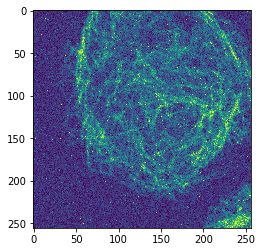

In [22]:
plt.imshow(noisy)